In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.linear_model import LinearRegression
#import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [3]:
airbnb = pd.read_csv(r"airbnb_listings_in_ottawa_may_2016.csv")

airbnb.shape
airbnb.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,25468,106030,Private room,NaN,BEACON HILL-CYRVILLE,8,4.5,2,1.0,NaN,29.0,2.0,45.450053,-75.589091,2016-05-16 23:47:32.757633
1,1,34220,147438,Private room,NaN,CAPITAL,0,NaN,2,1.0,1.0,161.0,7.0,45.409237,-75.678999,2016-05-16 23:14:17.559013
2,2,36642,157787,Private room,NaN,KITCHISSIPPI,60,4.5,2,1.0,NaN,56.0,1.0,45.401591,-75.746794,2016-05-16 23:12:51.307224
3,3,42100,184023,Private room,NaN,GLOUCESTER-SOUTH NEPEAN,0,NaN,1,1.0,2.0,31.0,1.0,45.320071,-75.607080,2016-05-16 22:58:04.288813
4,4,59258,284351,Entire home/apt,NaN,BAY,1,NaN,4,1.0,1.0,128.0,3.0,45.358996,-75.803144,2016-05-17 00:11:06.877538


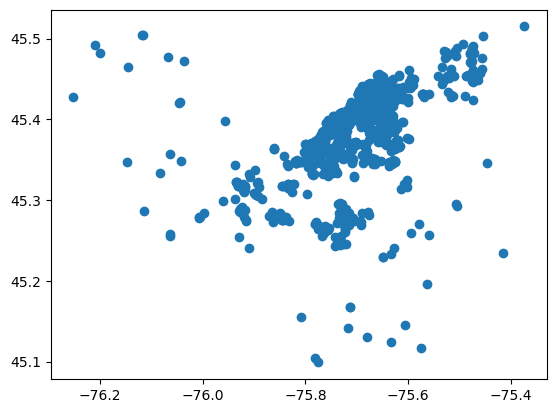

In [24]:
coordinates = airbnb.loc[:,['longitude','latitude']]

plt.scatter(airbnb.loc[:,['longitude']],airbnb.loc[:,['latitude']])


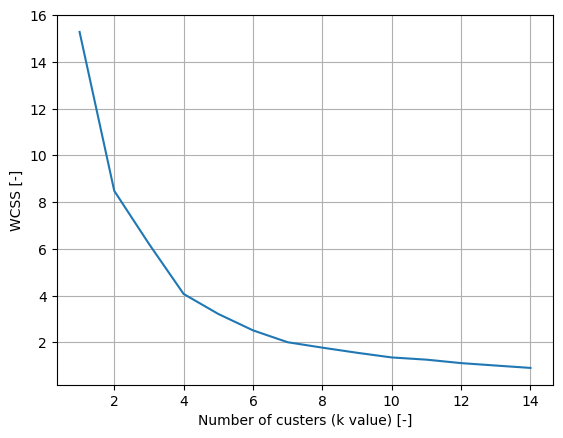

In [25]:
WCSS = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(coordinates)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1,15),WCSS)
plt.xlabel("Number of custers (k value) [-]")
plt.ylabel("WCSS [-]")
plt.grid()

[-76.252372 -76.251372 -76.250372 ... -75.376372 -75.375372 -75.374372]


/Users/aleksandramolenda/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


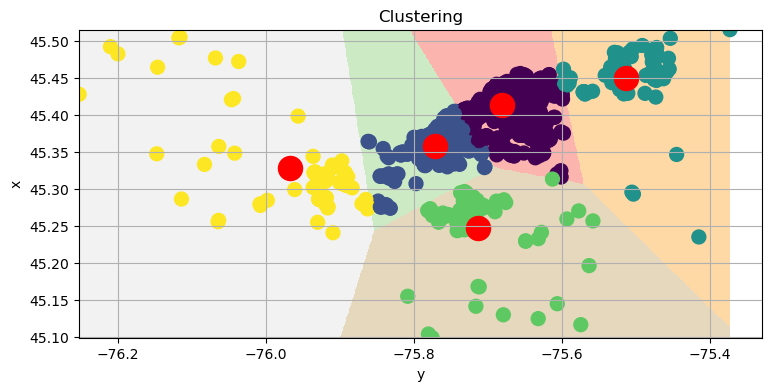

In [27]:
kmeans = KMeans(n_clusters = 5, max_iter = 300, random_state = 1)
clusters = kmeans.fit_predict(coordinates)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

h = 0.001
x_min,x_max = coordinates['longitude'].min(), coordinates['longitude'].max()
y_min,y_max = coordinates['latitude'].min(), coordinates['latitude'].max()

xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
print(xx.ravel())
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

plt.figure(1,figsize=(10,4))

plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap = plt.cm.Pastel1, origin='lower')
 
plt.scatter(x=coordinates['longitude'], y=coordinates['latitude'], c=labels, s=100)
 
plt.scatter(x=centroids[:,0], y=centroids[:,1],s=300 , c='red')
 
plt.ylabel('x') , plt.xlabel('y')
plt.grid()
plt.title("Clustering")
plt.show()


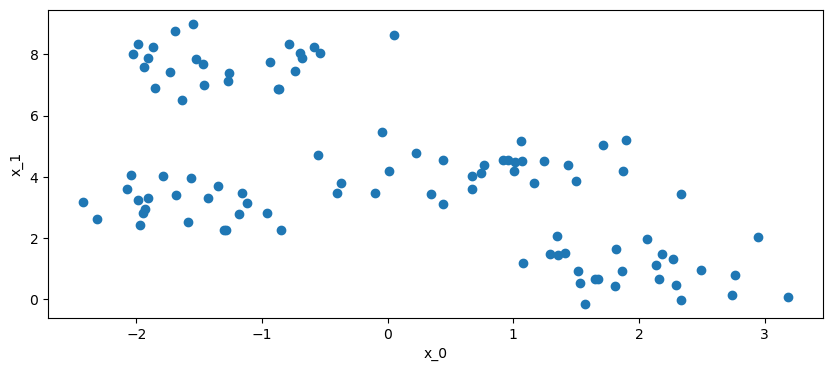

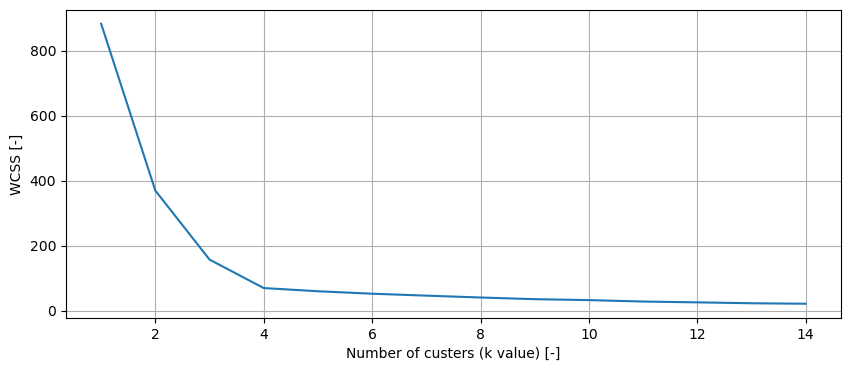

In [35]:
# ************ TEST for random data ************
    
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

plt.figure(1,figsize=(10,4))
plt.clf()

plt.scatter(X[:,0],X[:,1])
plt.xlabel("x_0")
plt.ylabel("x_1")
plt.show()

WCSS = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
plt.figure(1,figsize=(10,4))
plt.clf()    

plt.plot(range(1,15),WCSS)
plt.xlabel("Number of custers (k value) [-]")
plt.ylabel("WCSS [-]")
plt.grid()
plt.show()
